# Car Prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import requests
plt.style.use('ggplot')
%matplotlib inline

In [2]:
url = (
    'http://archive.ics.uci.edu/ml/machine-learning-databases/'
    'autos/imports-85.data'
)

header = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price',

]

In [3]:
df = pd.read_csv(url, names=header, na_values='?') 

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


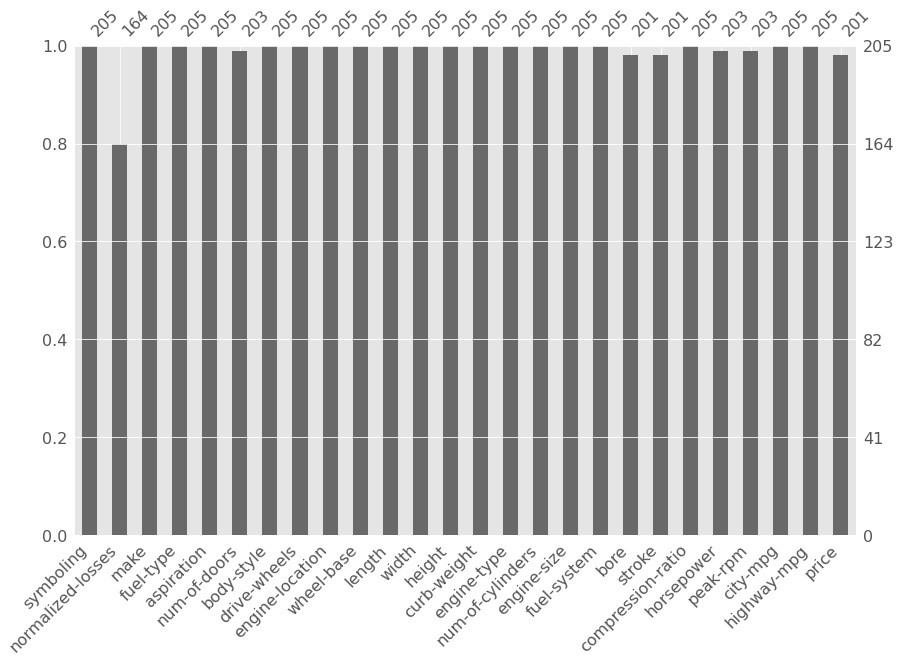

In [5]:
msno.bar(df, figsize=(14,9))

In [6]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
cols_with_msno = df.isna().sum()
mask = cols_with_msno > 0
cols_with_msno[mask]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [9]:
df = df[~df['price'].isnull()]

In [10]:
df.drop(labels=['normalized-losses'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [12]:
pd.set_option('display.max_columns', 25)

In [13]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [14]:
features = {
    'categorical': [
        'make', 'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels', 'engine-location', 
        'engine-type', 'num-of-cylinders', 'fuel-system',
        
    ],
    'numerical': [
        'symboling', 'wheel-base', 'length', 'width', 'height', 
        'curb-weight', 'engine-size', 'bore', 'stroke', 
        'compression-ratio', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 
    ],
}

features['all'] = features['categorical'] + features['numerical']

target = 'price'

In [15]:
features

{'all': ['make',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'body-style',
  'drive-wheels',
  'engine-location',
  'engine-type',
  'num-of-cylinders',
  'fuel-system',
  'symboling',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg'],
 'categorical': ['make',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'body-style',
  'drive-wheels',
  'engine-location',
  'engine-type',
  'num-of-cylinders',
  'fuel-system'],
 'numerical': ['symboling',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg']}

In [16]:
df[target].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [17]:
df[target] = df[target].astype(np.float64) / 1000
df[target].head()

0    13.495
1    16.500
2    16.500
3    13.950
4    17.450
Name: price, dtype: float64

In [18]:
df[features['categorical']].sample(n=3, random_state=42)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
98,nissan,gas,std,two,hardtop,fwd,front,ohc,four,2bbl
16,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi
31,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl


In [19]:
df[features['numerical']].sample(n=3, random_state=42)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
98,2,95.1,162.4,63.8,53.3,2008,97,3.15,3.29,9.4,69.0,5200.0,31,37
16,0,103.5,193.8,67.9,53.7,3380,209,3.62,3.39,8.0,182.0,5400.0,16,22
31,2,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76.0,6000.0,31,38


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df[features['all']],
    df[target],
    test_size=.25,
    random_state=22,
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((150, 24), (150,), (51, 24), (51,))

In [21]:
y_train.describe()

count    150.000000
mean      13.724267
std        8.224519
min        5.118000
25%        7.961500
50%       11.072000
75%       16.678750
max       45.400000
Name: price, dtype: float64

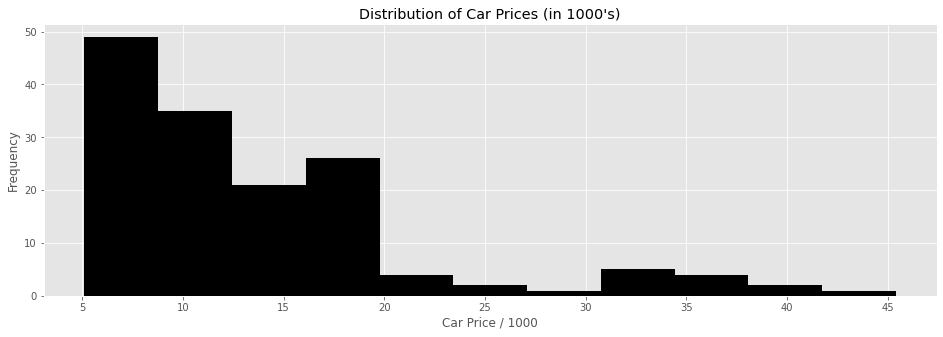

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

y_train.plot(
    title="Distribution of Car Prices (in 1000's)",
    kind='hist', 
    bins=11,
    color='k',
    ax=ax
)

ax.set_xlabel('Car Price / 1000')

fig.show()

In [23]:
df[features['all']].isna().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
engine-type          0
num-of-cylinders     0
fuel-system          0
symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
dtype: int64

In [24]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='most_frequent')
# x_train[x_train.columns] = imputer.fit_transform(x_train[x_train.columns])
# x_test[x_test.columns] = imputer.transform(x_test[x_test.columns])

# x_test.head()

In [25]:
x_test.isna().sum().sum()

0

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnNamesKeeper(TransformerMixin, BaseEstimator):
    
    def __init__(self, transformer):
        self._columns = None
        self.transformer = transformer
        
    def __repr__(self):
        return repr(self.transformer)
    
    def fit(self, x, y=None):
        self._columns = x.columns
        self.transformer.fit(x)
    
    def transform(self, x, y=None):
        x = self.transformer.transform(x)
        return pd.DataFrame(x, columns=self._columns)
        
    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x)

In [27]:
from sklearn.impute import SimpleImputer

imputer = ColumnNamesKeeper(SimpleImputer(strategy='most_frequent'))
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

x_test.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,subaru,gas,std,four,wagon,4wd,front,ohcf,four,2bbl,0,96.9,173.6,65.4,54.9,2420,108,3.62,2.64,9.0,82.0,4800.0,23,29
1,toyota,gas,std,four,sedan,fwd,front,ohc,four,2bbl,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.03,9.0,70.0,4800.0,28,34
2,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl,1,93.7,150.0,64.0,52.6,1940,92,2.91,3.41,9.2,76.0,6000.0,30,34
3,nissan,gas,std,four,sedan,fwd,front,ohcv,six,mpfi,0,100.4,181.7,66.5,55.1,3095,181,3.43,3.27,9.0,152.0,5200.0,17,22
4,toyota,gas,std,two,hardtop,rwd,front,ohc,four,mpfi,2,98.4,176.2,65.6,52.0,2536,146,3.62,3.5,9.3,116.0,4800.0,24,30


In [28]:
x_test.isna().sum().sum()

0

In [29]:
!pip install category_encoders --quiet

In [30]:
from category_encoders.ordinal import OrdinalEncoder

encoder = OrdinalEncoder(cols=features['categorical'], handle_unknown='value')

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

x_train.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,1,1,1,1,1,1,1,1,1,2,97.3,171.7,65.5,55.7,2264,97,3.01,3.4,23.0,52.0,4800.0,37,46
1,2,2,2,2,2,2,1,1,1,2,1,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175.0,5000.0,19,24
2,3,2,1,1,3,1,1,1,1,3,1,94.5,170.2,63.8,53.5,2037,97,3.15,3.29,9.4,69.0,5200.0,31,37
3,4,2,1,2,2,2,1,2,2,2,3,102.9,183.5,67.7,52.0,2976,171,3.27,3.35,9.3,161.0,5200.0,20,24
4,5,2,1,1,3,1,1,1,1,2,0,96.1,181.5,66.5,55.2,2579,132,3.46,3.9,8.7,68.0,5500.0,23,31


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

rgr = RandomForestRegressor(n_jobs=-1)
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)

In [32]:
print(rgr)

RandomForestRegressor(n_jobs=-1)


In [33]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}, RMSE: {:.2f}'.format(
        r2_score(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred),
        np.sqrt(mean_squared_error(y_test, y_pred)),
    )
)

R2: 0.90, MSE: 4.50, MAE: 1.37, RMSE: 2.12


In [34]:
df[target].describe()

count    201.000000
mean      13.207129
std        7.947066
min        5.118000
25%        7.775000
50%       10.295000
75%       16.500000
max       45.400000
Name: price, dtype: float64

In [35]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
     'predictions': y_pred,
     'error': np.abs(y_test - y_pred)
    }
)

df_pred.head()

,actuals,predictions,error
148,8.013,11.008683,2.995683
162,9.258,8.122740,1.135260
33,6.529,6.689510,0.160510
101,13.499,15.964470,2.465470
168,9.639,9.269120,0.369880


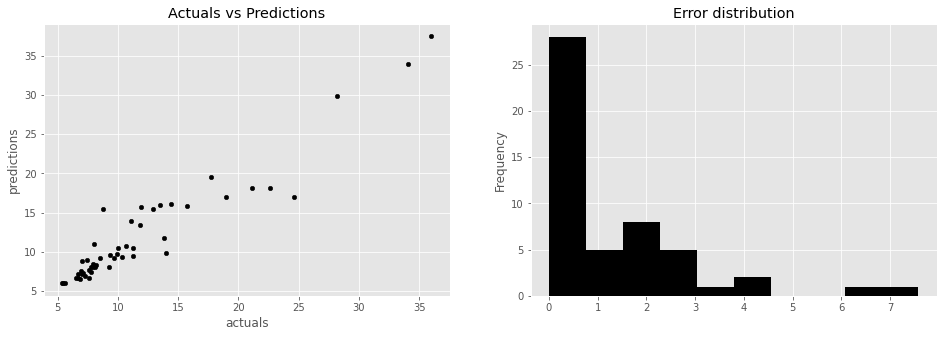

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x = 'actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Error distribution',
    kind='hist',
    color='k',
    ax=axs[1],
)

In [37]:
df_feature_importances = pd.DataFrame(
    {
        'Feature': x_train.columns,
        'Importance': rgr.feature_importances_,
    }
).sort_values(
    'Importance', ascending=False
)

df_feature_importances.head(10)

,Feature,Importance
16,engine-size,0.672041
15,curb-weight,0.196761
23,highway-mpg,0.045375
20,horsepower,0.013016
13,width,0.012976
22,city-mpg,0.008775
19,compression-ratio,0.006890
11,wheel-base,0.006078
14,height,0.005628
12,length,0.005314


###  compare forests

In [38]:
mae = []
n_estimator_option = [5, 50, 500, 5000]
for n_estimators in n_estimator_option:
  rgr = RandomForestRegressor(
      n_estimators=n_estimators,
      max_samples=.75,
      max_features=.75,
      bootstrap=True,
      n_jobs=-1
  )
  rgr.fit(x_train, y_train)
  y_pred = rgr.predict(x_test)
  mae.append(mean_absolute_error(y_test, y_pred))

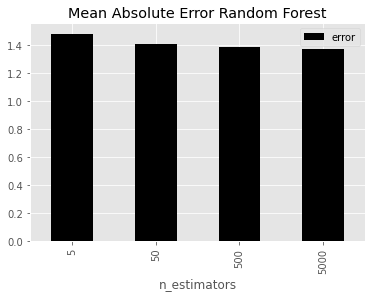

In [39]:
pd.DataFrame(
    {
        'n_estimators': n_estimator_option,
     'error': mae,
        
    }
).plot(
    title='Mean Absolute Error Random Forest',
    kind='bar',
    x='n_estimators',
    y='error',
    color='k'
)

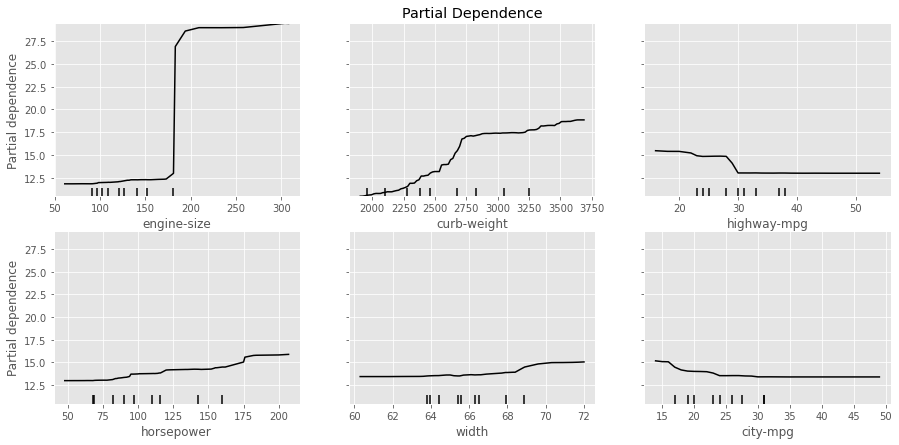

In [40]:
# from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay


fig, ax = plt.subplots(1, 1, figsize=(15, 7), sharey=False)

top_features = df_feature_importances['Feature'].head(6)

PartialDependenceDisplay.from_estimator(
    rgr, x_train, 
    features=top_features,
    n_cols=3, 
    n_jobs=-1,
    line_kw={'color': 'k'},
    ax=ax
) 

ax.set_title('Partial Dependence')

fig.show()

#  Bagging regressors

In [41]:
from sklearn.impute import SimpleImputer
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# num_imputer = ColumnNamesKeeper(
#     SimpleImputer(strategy='median', missing_values=np.nan)
# )
# cat_imputer = ColumnNamesKeeper(
#     SimpleImputer(strategy='most_frequent', missing_values=np.nan)
# )
# cat_scaler = ColumnNamesKeeper(
#     OneHotEncoder(cols=features['categorical'],
#                   handle_unknown='value')
# )
# num_scaler = ColumnNamesKeeper(
#     MinMaxScaler()
# )

# num_pipe = Pipeline(
#     [
#      ('num_imputer', num_imputer),
#      ('num_scaler', num_scaler)
#     ]
# )

# cat_pipe = Pipeline(
#     [
#      ('cat_imputer', cat_imputer),
#      ('cat_scaler', cat_scaler)
#     ]
# )

In [42]:
numerical_mputer = ColumnNamesKeeper(
  SimpleImputer(
  missing_values=np.nan,
  strategy='median'
  )
)
categorical_mputer = ColumnNamesKeeper(
  SimpleImputer(
  missing_values=np.nan,
  strategy='most_frequent'
  )
)
minmax_scaler = ColumnNamesKeeper(
 MinMaxScaler()
)
onehot_encoder = OneHotEncoder(
 cols=features['categorical'],
 handle_unknown='value'
)

numerical_pipeline = Pipeline(
  [
    ('numerical_mputer', numerical_mputer),
    ('minmax_scaler', minmax_scaler)
  ]
)
categorical_pipeline = Pipeline(
  [
    ('categorical_mputer', categorical_mputer),
    ('onehot_encoder', onehot_encoder)
  ]
)

x_train_knn = pd.concat(
  [
    numerical_pipeline.fit_transform(x_train[features['numerical']]),
    categorical_pipeline.fit_transform(x_train[features['categorical']]),
  ],
  axis=1
)

x_test_knn = pd.concat(
  [
    numerical_pipeline.transform(x_test[features['numerical']]),
    categorical_pipeline.transform(x_test[features['categorical']]),
  ],
  axis=1
)

In [43]:
# x_train_knn = pd.concat([
#     num_pipe.fit_transform(x_train[features['numerical']]),
#     cat_pipe.fit_transform(x_train[features['categorical']])                                                   
# ], axis=1)

# x_test_knn = pd.concat([
#     num_pipe.transform(x_test[features['numerical']]),
#     cat_pipe.transform(x_test[features['categorical']]) 
# ], axis=1)

In [44]:
x_test_knn.isna().sum().sum()

0

## Combining KNN estimators using a bagging meta-estimator

In [45]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor


rgr = BaggingRegressor(
    base_estimator=KNeighborsRegressor(n_neighbors=1),
    n_estimators=400,
)

rgr.fit(x_train_knn, y_train)
y_test_pred = rgr.predict(x_test_knn)

In [46]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred),
    )
)

R2: 0.87, MSE: 6.16, MAE: 1.75


In [47]:
rgr = KNeighborsRegressor(
    n_neighbors=3
)

rgr.fit(x_train_knn, y_train)
y_test_pred = rgr.predict(x_test_knn)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred),
    )
)

R2: 0.87, MSE: 6.09, MAE: 1.84


# Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(
    n_estimators=1000, 
    max_depth=3, 
    learning_rate=0.01, 
    loss='squared_error'
)

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

In [50]:
print(
    'R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        mean_absolute_error(y_test, y_test_pred),
    )
)

R2: 0.92, MSE: 3.90, RMSE: 1.97, MAE: 1.41


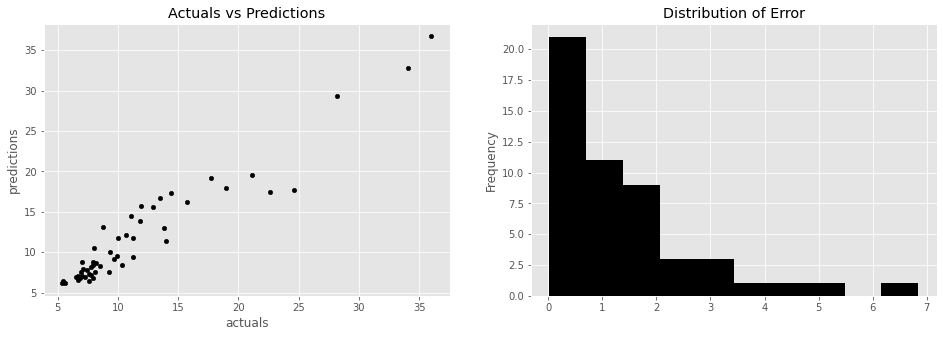

In [51]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
        'predictions': y_test_pred,
    }
)

df_pred['error'] = np.abs(y_test - y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x='actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Distribution of Error',
    kind='hist',
    color='k',
    ax=axs[1],
)

fig.show()

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.02, loss='squared_error')
rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MSE: 4.280900554319879


In [54]:
def calculate_deviance(estimator, x_test, y_test):

    train_errors = estimator.train_score_
    test_errors = [
        estimator.loss_(y_test, y_pred_staged) # mean_squared_error(y_test, y_pred_staged)
        for y_pred_staged in estimator.staged_predict(x_test)
    ]

    return pd.DataFrame(
        {
            'n_estimators': range(1, estimator.estimators_.shape[0]+1),
            'train_error': train_errors,
            'test_error': test_errors,
        }
    ).set_index('n_estimators')

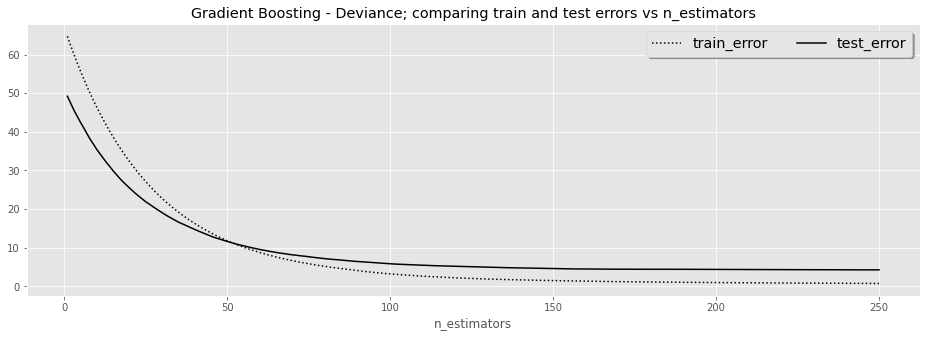

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

df_deviance = calculate_deviance(rgr, x_test, y_test)

df_deviance['train_error'].plot(
    kind='line',
    color='k',
    linestyle=':',
    ax=ax
)

df_deviance['test_error'].plot(
    kind='line',
    color='k',
    linestyle='-',
    ax=ax
)

ax.set_title('Gradient Boosting - Deviance; comparing train and test errors vs n_estimators')

ax.legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

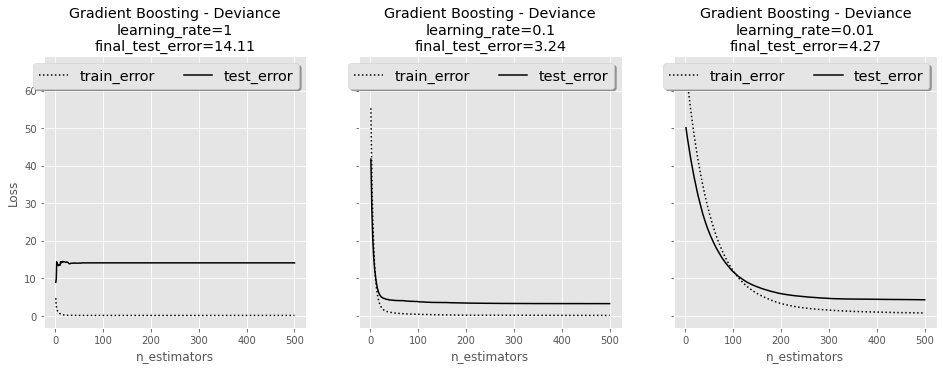

In [57]:
learning_rates = [1, 0.1, 0.01]

fig, axs = plt.subplots(1, len(learning_rates), figsize=(16, 5), sharey=True)

for i, learning_rate in enumerate(learning_rates):
    
    rgr = GradientBoostingRegressor(
        n_estimators=500, 
        learning_rate=learning_rate, 
        loss='squared_error'
      )
    rgr.fit(x_train, y_train)
    y_test_pred = rgr.predict(x_test)

    final_test_error = mean_squared_error(y_test, y_test_pred)

    df_deviance = calculate_deviance(rgr, x_test, y_test)

    df_deviance['train_error'].plot(
        title='Gradient Boosting - Deviance',
        kind='line',
        color='k',
        linestyle=':',
        ax=axs[i]
    )

    df_deviance['test_error'].plot(
        title=f'Gradient Boosting - Deviance\nlearning_rate={learning_rate}\nfinal_test_error={final_test_error:.2f}',
        kind='line',
        color='k',
        linestyle='-',
        ax=axs[i]
    )

    axs[i].set_ylabel('Loss')

    axs[i].legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

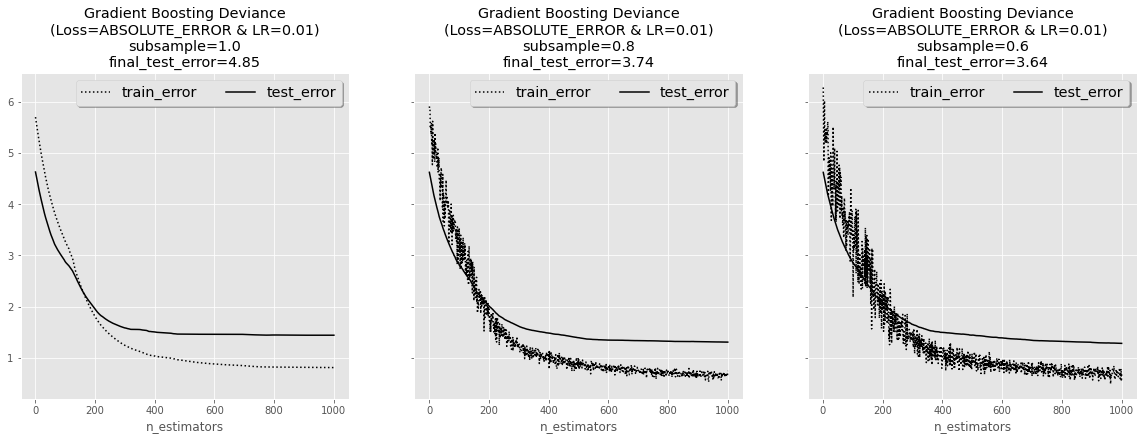

In [61]:
subsamples = [1.0, 0.8, 0.6]

fig, axs = plt.subplots(1, len(subsamples), figsize=(20, 6), sharey=True)

for i, subsample in enumerate(subsamples):
    
    loss = 'absolute_error'
    learning_rate = 0.01
    
    rgr = GradientBoostingRegressor(
        n_estimators=1000, subsample=subsample, 
        learning_rate=learning_rate, loss=loss
    )
    rgr.fit(x_train, y_train)
    y_test_pred = rgr.predict(x_test)

    final_test_error = mean_squared_error(y_test, y_test_pred)

    df_deviance = calculate_deviance(rgr, x_test, y_test)

    df_deviance['train_error'].plot(
        title='Gradient Boosting - Deviance',
        kind='line',
        color='k',
        linestyle=':',
        ax=axs[i]
    )

    df_deviance['test_error'].plot(
        title=(
            f'Gradient Boosting Deviance\n(Loss={loss.upper()} & '
            f'LR={learning_rate})\nsubsample={subsample}\n'
            f'final_test_error={final_test_error:.2f}'
        ),
        kind='line',
        color='k',
        linestyle='-',
        ax=axs[i]
    )

    axs[i].legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()